In [326]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [327]:
print("Downloading mnist...")
mnist = np.load('mnist.npz')

normalize = lambda X : (2/255)*X - 1

In [328]:
num_train_images = 1000

Xtrain = normalize(mnist['x_train'][:num_train_images])
Ytrain = mnist['y_train'][:num_train_images]

In [329]:
# Creating the digits classifiers using least squares
Xtrain = Xtrain.reshape(num_train_images, -1).astype(np.float64)
Ytrain = Ytrain.reshape(num_train_images, -1).astype(np.float64)

labels = {}

for i in range(0, 10):
    labels[i] = np.copy(Ytrain)
    labels[i][labels[i] != i] = -1
    labels[i][labels[i] == i] = 1

detectors = {}

for i in range(0, 10):
    detectors[i] = np.linalg.lstsq(Xtrain, labels[i])[0]

def determine_digit(image):
    estimates = []

    for i in range(0, 10):
        estimates.append(np.matmul(image.reshape(1,-1).astype(np.float64), detectors[i]))
    
    return np.argmax(estimates)

C:\Users\aloks\AppData\Local\Temp\ipykernel_6244\1056554123.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  detectors[i] = np.linalg.lstsq(Xtrain, labels[i])[0]


This is a 5


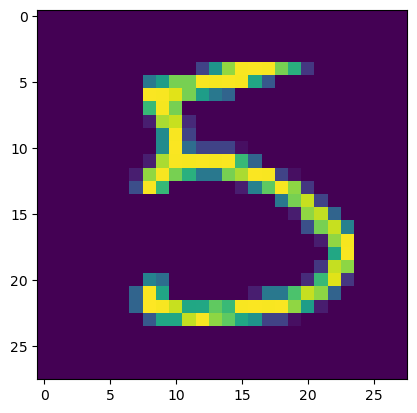

In [330]:
num_test_images = 100

Xtest = normalize(mnist['x_test'][:num_test_images])
Ytest = mnist['y_test'][:num_test_images]

i = random.randrange(0, num_test_images, 1)

image = Xtest[i]

plt.imshow(image)

print("This is a " + str(determine_digit(image)))

In [332]:
guesses = []

for image in Xtest:
    guesses.append(determine_digit(image))

truths = np.array(guesses)

truths[truths != Ytest] = 0
truths[truths == Ytest] = 1

hits = np.sum(truths)
misses = np.sum(1-truths)

prediction_rate = hits/num_test_images
miss_rate = misses/num_test_images

print(prediction_rate)
print(miss_rate)


0.64
0.36
